In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df_train = pd.read_csv('/content/drive/My Drive/CL_Cup IT 2020_DS_1 тур/CUP_IT_train_data.csv', sep=',', skiprows=133)

In [0]:
df_train.head()

,cif_id,dlk_cob_date,gi_smooth_3m,big_city,cu_gender,cu_education_level,cu_empl_area,cu_empl_level,payroll_f,cur_quantity_pl,cur_quantity_mort,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,cur_quantity_accounts,cur_quantity_saccounts,cur_quantity_mf,cc_balance,cl_balance,ml_balance,pl_balance,td_volume,ca_volume,sa_volume,mf_volume,dc_cash_spend_v,dc_cash_spend_c,cc_cash_spend_v,cc_cash_spend_c,dc_pos_spend_v,dc_pos_spend_c,cc_pos_spend_v,cc_pos_spend_c,ca_f,rc_session_qnt_cur_mon,cur_qnt_sms,active,standalone_dc_f,standalone_payroll_dc_f,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,cu_empl_cur_dur_m,is_married,cu_eduaction_level
0,335992,2018-06-30,17.957530,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-1700.60184,NaN,4.62528,NaN,NaN,0.0,0,0.0,0,10.41888,3,0.0,0,1,0,1.0,1,0,0,0,1192.8,29.0,144,46.0,1,2
1,335992,2018-04-30,27.720918,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-1911.42936,NaN,300.73056,NaN,NaN,168.0,2,0.0,0,190.21536,14,0.0,0,1,0,1.0,1,0,0,0,1192.8,29.0,142,44.0,1,2
2,335992,2018-05-31,21.949626,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-1807.09176,NaN,13.04472,NaN,NaN,0.0,0,0.0,0,161.63760,16,0.0,0,1,0,1.0,1,0,0,0,1192.8,29.0,143,45.0,1,2
3,335992,2018-08-31,14.855459,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-1484.08752,NaN,0.35184,NaN,NaN,0.0,0,0.0,0,0.00000,0,0.0,0,1,0,1.0,1,0,0,0,1192.8,29.0,146,48.0,1,2
4,335992,2018-03-31,27.917161,MLN,0,02. Среднее профессиональное,ТОРГОВЛЯ,SUPPORT STAFF,0,1,0,0,0,1,1,0,0,NaN,NaN,NaN,-2015.04648,NaN,793.68216,NaN,NaN,333.6,3,0.0,0,322.27032,28,0.0,0,1,0,1.0,1,0,0,0,1192.8,29.0,141,43.0,1,2


In [0]:
df_train['cif_id'].nunique()

396576

In [0]:
df_train.shape

(4161783, 46)

In [0]:
df_train['dlk_cob_date'] = pd.to_datetime(df_train['dlk_cob_date'], yearfirst=True)

In [0]:
df_train.sort_values(['cif_id', 'dlk_cob_date'], inplace=True)

In [0]:
grouped = df_train.groupby(by='cif_id').count()

In [0]:
only_12 = grouped[grouped['dlk_cob_date'] != 12]

In [0]:
unstable_users = only_12.index

In [0]:
unstable_users

Int64Index([  1014,   1020,   1021,   1030,   1031,   1035,   1038,   1048,
              1055,   1060,
            ...
            511497, 511500, 511501, 511506, 511510, 511514, 511517, 511520,
            511526, 511535],
           dtype='int64', name='cif_id', length=96885)

In [0]:
grouped['dlk_cob_date'].describe()

count    396576.000000
mean         10.494289
std           3.076219
min           1.000000
25%          12.000000
50%          12.000000
75%          12.000000
max          12.000000
Name: dlk_cob_date, dtype: float64

In [0]:
df_train['big_city'].unique()

array(['MLN', 'OTH', 'MSK', 'SPB'], dtype=object)

In [0]:
cat_columns = df_train.dtypes[df_train.dtypes == 'object']

In [0]:
df_train.dtypes

cif_id                                 int64
dlk_cob_date                  datetime64[ns]
gi_smooth_3m                         float64
big_city                              object
cu_gender                              int64
cu_education_level                    object
cu_empl_area                          object
cu_empl_level                         object
payroll_f                              int64
cur_quantity_pl                        int64
cur_quantity_mort                      int64
cur_quantity_cc                        int64
cur_quantity_deposits                  int64
cur_quantity_dc                        int64
cur_quantity_accounts                  int64
cur_quantity_saccounts                 int64
cur_quantity_mf                        int64
cc_balance                           float64
cl_balance                           float64
ml_balance                           float64
pl_balance                           float64
td_volume                            float64
ca_volume 

In [0]:
df_train['cu_eduaction_level'].unique()

array([   2,    3,    1, -100,    4])

In [0]:
target = df_train[df_train['dlk_cob_date'] >= '2018-07-01'][['cif_id', 'gi_smooth_3m']].groupby('cif_id').sum()

In [0]:
cu_columns = []
for i in df_train.columns:
    if i.find('cu_') != -1:
        cu_columns.append(i)

In [0]:
df_train = df_train[df_train['dlk_cob_date'] < '2018-07-01']

In [0]:
df_train = pd.merge(df_train, target, how='left', left_on='cif_id', right_index=True)

In [0]:
df_train.head()

,cif_id,dlk_cob_date,gi_smooth_3m_x,big_city,cu_gender,cu_education_level,cu_empl_area,cu_empl_level,payroll_f,cur_quantity_pl,cur_quantity_mort,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,cur_quantity_accounts,cur_quantity_saccounts,cur_quantity_mf,cc_balance,cl_balance,ml_balance,pl_balance,td_volume,ca_volume,sa_volume,mf_volume,dc_cash_spend_v,dc_cash_spend_c,cc_cash_spend_v,cc_cash_spend_c,dc_pos_spend_v,dc_pos_spend_c,cc_pos_spend_v,cc_pos_spend_c,ca_f,rc_session_qnt_cur_mon,cur_qnt_sms,active,standalone_dc_f,standalone_payroll_dc_f,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,cu_empl_cur_dur_m,is_married,cu_eduaction_level,gi_smooth_3m_y
1342694,1001,2018-01-31,70.994186,MLN,1,02. Среднее профессиональное,"Строительство, недвижимость",SUPPORT STAFF,0,1,0,1,0,0,3,0,0,-2560.92120,NaN,NaN,-8259.28344,NaN,16.62792,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0,1,0,-100.0,1,0,0,0,1051.2,56.0,121,123.0,1,2,322.283363
1342693,1001,2018-02-28,-6.005108,MLN,1,02. Среднее профессиональное,"Строительство, недвижимость",SUPPORT STAFF,0,1,0,1,0,0,3,0,0,-2407.50144,NaN,NaN,-8381.09424,NaN,16.62792,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0,1,0,-100.0,1,0,0,0,1051.2,56.0,122,124.0,1,2,322.283363
1342691,1001,2018-03-31,114.989605,MLN,1,02. Среднее профессиональное,"Строительство, недвижимость",SUPPORT STAFF,0,0,0,1,0,0,3,0,0,-2255.23944,NaN,NaN,NaN,NaN,3514.35960,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0,1,0,-100.0,1,0,0,0,1051.2,56.0,123,125.0,1,2,322.283363
1342690,1001,2018-04-30,147.408528,MLN,1,02. Среднее профессиональное,"Строительство, недвижимость",SUPPORT STAFF,0,0,0,1,0,0,3,0,0,-2302.17480,NaN,NaN,NaN,NaN,3514.35960,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0,1,0,-100.0,1,0,0,0,1051.2,56.0,124,126.0,1,2,322.283363
1342692,1001,2018-05-31,185.987934,MLN,1,02. Среднее профессиональное,"Строительство, недвижимость",SUPPORT STAFF,0,0,0,1,0,0,3,0,0,-2350.82808,NaN,NaN,NaN,NaN,3514.35960,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0,1,0,-100.0,1,0,0,0,1051.2,56.0,125,127.0,1,2,322.283363


In [0]:
df_train['cu_education_level'].unique()

array(['02. Среднее профессиональное', '03. Высшее', '01. Среднее', nan,
       '04. Второе высшее, ученая степень'], dtype=object)

In [0]:
df_train['cu_empl_level'].unique()

array(['SUPPORT STAFF', 'BLUE COLLAR STAFF', '03', 'TRADE REPRESENTATIVE',
       'QUALIFIED STAFF', nan, 'MIDDLE MANAGEMENT', 'SALES MANAGER', '01',
       'SENIOR MANAGEMENT', 'Self-employed', '02', 'INSURANCE AGENT',
       'Other', '06', 'SELF-EMPLOYED', 'OTHER', '04', '05',
       'начальник отдела продаж', 'АО ТПК', 'начальник отдела', '-',
       'пРОДАВЕЦ-КОНСУЛЬТАНТ', 'ассистент', 'Other - учащаяся',
       'Директор'], dtype=object)

In [0]:
def MAPE(y_true, y_pred):
    error = np.abs((y_true - y_pred) / (y_true + 1))
    return np.mean(error) * 100

In [0]:
df = df_train.drop(['cu_education_level', 'cu_empl_area', 'cu_empl_level',
              'cu_empl_cur_dur_m'], axis=1)

In [0]:
df.head()

,cif_id,dlk_cob_date,gi_smooth_3m_x,big_city,cu_gender,payroll_f,cur_quantity_pl,cur_quantity_mort,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,cur_quantity_accounts,cur_quantity_saccounts,cur_quantity_mf,cc_balance,cl_balance,ml_balance,pl_balance,td_volume,ca_volume,sa_volume,mf_volume,dc_cash_spend_v,dc_cash_spend_c,cc_cash_spend_v,cc_cash_spend_c,dc_pos_spend_v,dc_pos_spend_c,cc_pos_spend_v,cc_pos_spend_c,ca_f,rc_session_qnt_cur_mon,cur_qnt_sms,active,standalone_dc_f,standalone_payroll_dc_f,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,is_married,cu_eduaction_level,gi_smooth_3m_y
1342694,1001,2018-01-31,70.994186,MLN,1,0,1,0,1,0,0,3,0,0,-2560.92120,NaN,NaN,-8259.28344,NaN,16.62792,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0,1,0,-100.0,1,0,0,0,1051.2,56.0,121,1,2,322.283363
1342693,1001,2018-02-28,-6.005108,MLN,1,0,1,0,1,0,0,3,0,0,-2407.50144,NaN,NaN,-8381.09424,NaN,16.62792,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0,1,0,-100.0,1,0,0,0,1051.2,56.0,122,1,2,322.283363
1342691,1001,2018-03-31,114.989605,MLN,1,0,0,0,1,0,0,3,0,0,-2255.23944,NaN,NaN,NaN,NaN,3514.35960,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0,1,0,-100.0,1,0,0,0,1051.2,56.0,123,1,2,322.283363
1342690,1001,2018-04-30,147.408528,MLN,1,0,0,0,1,0,0,3,0,0,-2302.17480,NaN,NaN,NaN,NaN,3514.35960,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0,1,0,-100.0,1,0,0,0,1051.2,56.0,124,1,2,322.283363
1342692,1001,2018-05-31,185.987934,MLN,1,0,0,0,1,0,0,3,0,0,-2350.82808,NaN,NaN,NaN,NaN,3514.35960,NaN,NaN,0.0,0,0.0,0,0.0,0,0.0,0,1,0,-100.0,1,0,0,0,1051.2,56.0,125,1,2,322.283363


In [0]:
df = df.fillna(0)

In [0]:
df['pl_balance'].describe()

count    2.057178e+06
mean    -3.289187e+03
std      5.799219e+03
min     -7.538658e+04
25%     -4.758689e+03
50%      0.000000e+00
75%      0.000000e+00
max      0.000000e+00
Name: pl_balance, dtype: float64

In [0]:
df['all_credits_count'] = df['cur_quantity_pl'] + df['cur_quantity_mort']
df['all_cards_count'] = df['cur_quantity_dc'] + df['cur_quantity_cc']
df['all_accounts_count'] = df['cur_quantity_accounts'] + df['cur_quantity_deposits'] + df['cur_quantity_saccounts'] + df['cur_quantity_mf']
df['pl_share'] = df['cur_quantity_pl'] / df['all_credits_count']
df['mort_share'] = df['cur_quantity_mort'] / df['all_credits_count']
df['dc_share'] = df['cur_quantity_dc'] / df['all_cards_count']
df['cc_share'] = df['cur_quantity_cc'] / df['all_cards_count']
df['acc_share'] = df['cur_quantity_accounts'] / df['all_accounts_count']
df['dep_share'] = df['cur_quantity_deposits'] / df['all_accounts_count']
df['sacc_share'] = df['cur_quantity_saccounts'] / df['all_accounts_count']
df['mf_share'] = df['cur_quantity_mf'] / df['all_accounts_count']
df['all_credits_sum'] = df['cc_balance'] + df['cl_balance'] + df['ml_balance'] + df['pl_balance']
df['cc_sumshare'] = df['cc_balance'] / df['all_credits_sum']
df['cl_sumshare'] = df['cl_balance'] / df['all_credits_sum']
df['ml_sumshare'] = df['ml_balance'] / df['all_credits_sum']
df['pl_sumshare'] = df['pl_balance'] / df['all_credits_sum']
df['all_accounts_sum'] = df['td_volume'] + df['ca_volume'] + df['sa_volume'] + df['mf_volume']
df['td_sumshare'] = df['td_volume'] / df['all_accounts_sum']
df['ca_sumshare'] = df['ca_volume'] / df['all_accounts_sum']
df['sa_sumshare'] = df['sa_volume'] / df['all_accounts_sum']
df['mf_sumshare'] = df['mf_volume'] / df['all_accounts_sum']
df['avg_cash_spend_cc'] = df['cc_cash_spend_v'] / df['cc_cash_spend_c']
df['avg_cash_spend_dc'] = df['dc_cash_spend_v'] / df['dc_cash_spend_c']
df['sum_spend_cash'] = df['cc_cash_spend_v'] + df['dc_cash_spend_v']
df['count_spend_cash'] = df['cc_cash_spend_c'] + df['dc_cash_spend_c']
df['dc_cash_share'] = df['dc_cash_spend_v'] / df['sum_spend_cash']
df['cc_cash_share'] = df['cc_cash_spend_v'] / df['sum_spend_cash']
df['pos_sum'] = df['dc_pos_spend_v'] + df['cc_pos_spend_v']
df['pos_count'] = df['dc_pos_spend_c'] + df['cc_pos_spend_c']
df['dc_pos_share_sum'] = df['dc_pos_spend_v'] / df['pos_sum']
df['cc_pos_share_sum'] = df['cc_pos_spend_v'] / df['pos_sum']
df['dc_pos_share_count'] = df['dc_pos_spend_c'] / df['pos_count']
df['cc_pos_share_count'] = df['cc_pos_spend_c'] / df['pos_count']

In [0]:
df['cif_id'].nunique()

364617

In [0]:
df.dlk_cob_date = df.dlk_cob_date.apply(lambda x: x.month)

In [0]:
df = df.set_index(['cif_id', 'dlk_cob_date']).unstack().fillna(0)

In [0]:
df.shape

(364617, 444)

In [0]:
lst_diff_sum = ['gi_smooth_3m_x', 'salary', 
                 'all_accounts_sum', 'all_credits_sum',
                 'sum_spend_cash', 'dc_cash_spend_v', 'dc_cash_spend_c', 
                'cc_cash_spend_v','cc_cash_spend_c', 'dc_pos_spend_v', 
                'dc_pos_spend_c', 'cc_pos_spend_v',
       'cc_pos_spend_c','cc_balance', 'cl_balance',
       'ml_balance', 'pl_balance', 'td_volume', 'ca_volume', 'sa_volume',
       'mf_volume', 'cur_quantity_pl', 'cur_quantity_mort', 'cur_quantity_cc',
       'cur_quantity_deposits', 'cur_quantity_dc', 'cur_quantity_accounts',
       'cur_quantity_saccounts', 'cur_quantity_mf', 'standalone_dc_f', 'standalone_payroll_dc_f',
       'standalone_nonpayroll_dc_f', 'all_credits_count', 'all_cards_count', 'all_accounts_count',
       'pl_share', 'mort_share', 'dc_share', 'cc_share', 'acc_share',
       'dep_share', 'sacc_share', 'mf_share', 'cc_sumshare',
       'cl_sumshare', 'ml_sumshare', 'pl_sumshare',
       'td_sumshare', 'ca_sumshare', 'sa_sumshare', 'mf_sumshare',
       'avg_cash_spend_cc', 'avg_cash_spend_dc',
       'count_spend_cash', 'dc_cash_share', 'cc_cash_share', 'pos_sum',
       'pos_count', 'dc_pos_share_sum', 'cc_pos_share_sum',
       'dc_pos_share_count', 'cc_pos_share_count']

In [0]:
for col in lst_diff_sum:
  df['diff_sum_' + col] = df[col].diff(axis=1).drop(1,axis=1).sum(axis=1)

In [0]:
for col in lst_diff_sum:
  df['max_diff_' + col] = df[col].diff(axis=1).drop(1,axis=1).max(axis=1)

In [0]:
for col in lst_diff_sum:
  df['min_diff_' + col] = df[col].diff(axis=1).drop(1,axis=1).min(axis=1)

In [0]:
lst_diff_mean = ['salary', 'all_accounts_sum', 'all_credits_sum',
                 'gi_smooth_3m_x','cc_balance', 
                 'cl_balance','ml_balance', 'pl_balance', 'td_volume', 
                 'ca_volume', 'sa_volume','mf_volume', 'sum_spend_cash', ]

In [0]:
for col in lst_diff_mean:
  df['diff_mean_' + col] = df['diff_sum_'+col]/5

In [0]:
last_col_lst = ['cur_quantity_pl', 'cur_quantity_mort', 'cur_quantity_cc',
       'cur_quantity_deposits', 'cur_quantity_dc', 'cur_quantity_accounts',
       'cur_quantity_saccounts', 'cur_quantity_mf', 'ca_f', 'cu_age', 'cu_mob', 
       'is_married', 'cu_eduaction_level', 'big_city', 'cu_gender', 'standalone_dc_f', 'standalone_payroll_dc_f',
       'standalone_nonpayroll_dc_f', 'active', 'gi_smooth_3m_y', 'payroll_f', 'gi_smooth_3m_x']

In [0]:
for col in last_col_lst:
  df[col+'_m6'] = df[col][6]
  if col != 'gi_smooth_3m_x':
    df.drop(col, axis=1, inplace=True)

In [0]:
summary_col_lst = ['gi_smooth_3m_x', 'salary', 
                 'all_accounts_sum', 'all_credits_sum',
                 'sum_spend_cash', 'dc_cash_spend_v', 'dc_cash_spend_c', 
                'cc_cash_spend_v','cc_cash_spend_c', 'dc_pos_spend_v', 
                'dc_pos_spend_c', 'cc_pos_spend_v',
       'cc_pos_spend_c','cc_balance', 'cl_balance',
       'ml_balance', 'pl_balance', 'td_volume', 'ca_volume', 'sa_volume',
       'mf_volume','all_credits_count', 'all_cards_count', 'all_accounts_count',
       'pl_share', 'mort_share', 'dc_share', 'cc_share', 'acc_share',
       'dep_share', 'sacc_share', 'mf_share', 'cc_sumshare',
       'cl_sumshare', 'ml_sumshare', 'pl_sumshare',
       'td_sumshare', 'ca_sumshare', 'sa_sumshare', 'mf_sumshare',
       'avg_cash_spend_cc', 'avg_cash_spend_dc',
       'count_spend_cash', 'dc_cash_share', 'cc_cash_share', 'pos_sum',
       'pos_count', 'dc_pos_share_sum', 'cc_pos_share_sum',
       'dc_pos_share_count', 'cc_pos_share_count', 'cur_qnt_sms','rc_session_qnt_cur_mon']

In [0]:
for col in summary_col_lst:
    df['sum_' + col] = df[col].sum(axis=1)
    df['min_' + col] = df[col].min(axis=1)
    df['max_' + col] = df[col].max(axis=1)
    df['mean_' + col] = df[col].sum(axis=1)/6
    df.drop(col, axis=1, inplace=True)


In [0]:
df.columns = [ ''.join([str(c) for c in c_list]) for c_list in df.columns.values ]

In [0]:
df['big_city_m6']

cif_id
1001      MLN
1002      OTH
1004      OTH
1005      MSK
1007      OTH
         ... 
511533    MSK
511534    OTH
511535    OTH
511536    OTH
511537    MSK
Name: big_city_m6, Length: 364617, dtype: object

In [0]:
city = pd.get_dummies(df['big_city_m6'])

In [0]:
df = pd.concat([df, city], axis=1)

In [0]:
df.drop(['big_city_m6'], axis=1, inplace=True)

In [0]:
y = df['gi_smooth_3m_y_m6']
X = df.drop('gi_smooth_3m_y_m6', axis=1, inplace=True)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(tr.values[:, 1:], y, test_size=0.2)

In [0]:
y_train.shape

(68759, 75)

In [0]:
import lightgbm as lgb

In [0]:
model = lgb.LGBMRegressor()

In [0]:
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
pred = model.predict(X_test)

In [0]:
MAPE(y_test, pred)

398.10144899390923

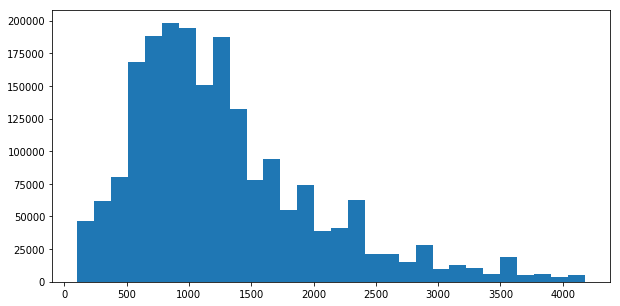

In [0]:
import matplotlib.pyplot as plt
from scipy.stats import trimboth

plt.figure(figsize=(10,5))
# plt.hist(df.salary.map(np.log), bins = 30)
plt.hist(trimboth(df.salary, 0.01), bins = 30)
# plt.xscale('log')
plt.show()

In [0]:
import hyperopt
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll import scope

In [0]:
# Пространство перебора гиперпараметров для hyperopt

space ={
        'boosting_type': hp.choice( 'boosting_type', ['gbdt', 'dart' ] ),
        'max_depth': scope.int(hp.quniform("max_depth", 4, 9, 1)),
        'n_estimators': scope.int(hp.quniform('n_estimators', 100, 1000, 10)),
        'num_leaves': scope.int(hp.quniform ('num_leaves', 20, 100, 1)),
        'min_data_in_leaf':  scope.int(hp.quniform ('min_data_in_leaf', 10, 100, 1)),
        'feature_fraction': hp.uniform('feature_fraction', 0.75, 1.0),
        'bagging_fraction': hp.uniform('bagging_fraction', 0.75, 1.0),
        'learning_rate': hp.loguniform('learning_rate', -6.9, -0.5),
        'min_sum_hessian_in_leaf': hp.loguniform('min_sum_hessian_in_leaf', 0, 2.3),
        'lambda_l1': hp.uniform('lambda_l1', 1e-4, 1e-6 ),
        'lambda_l2': hp.uniform('lambda_l2', 1e-4, 1e-6 ),
        'seed': hp.randint('seed',2000000)
       }

In [0]:

# Целевая функция для hyperopt (по ней оптимизируемся)

def objective(space):
    clf = lgb.LGBMClassifier(**space)
    current_score = cross_val_score(clf, x_train, y_train, cv = 5, scoring = make_scorer(MAPE, needs_proba = False)).mean()
    return -current_score